# Example 9.6: Jet Propulsion (Cold-Air-Standard)

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement



## Solution


### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be using.

In [1]:
from kilojoule.templates.kSI_K import *
   
air = idealgas.Properties('Air')

/opt/anaconda/lib/python3.8/site-packages/mpmath/ctx_mp_python.py:892: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if other is 0:
/opt/anaconda/lib/python3.8/site-packages/mpmath/ctx_mp_python.py:986: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if other is 0:


### Given Parameters
We now define variables to hold our known values.

In [2]:
T[1] = Quantity(-40,'degC')   # Inlet Temperature
p[1] = Quantity(35,'kPa')     # Compressor Inlet pressure
r_p = Quantity(10,' ')  # Pressure ratio
T[4] = Quantity(1000,'degC')  # Turbine inlet temperature
mdot = Quantity(50,'kg/s')    # mass flow rate
V=Vel
V[1] = Quantity(250,'m/s')

display.Summary(locals());

<IPython.core.display.Latex object>

,T,p,Vel
unit,K,kPa,m/s
1,233.15,35,250
4,1273.15,-,-


### Assumptions
- Cold-air-standard Analysis
  - Ideal gas
  - Constant specific heat (evaluated at $25^\circ\text{C}$)
- Isobaric heat exchagners: Combustors
- Negligible changes in kinetic energy
- Negligible changes in potential energy

In [3]:
# Ideal Gas
R = air.R

# Constant thermal properties evaluated at room temperature
T_room = Quantity(25,'degC')
c_v = air.Cv(T=T_room)
c_p = air.Cp(T=T_room)
k = air.k(T=T_room)

display.Summary(locals());

<IPython.core.display.Latex object>

,T,p,Vel
unit,K,kPa,m/s
1,233.15,35,250
4,1273.15,-,-


#### (a) $w_{net}$

In [4]:
#### 1$\to$2) Diffuser
# 
T[2] = T[1].to('K') + V[1]**2/(2*c_p)
p[2] = p[1]*(T[2].to('K')/T[1].to('K'))**(k/(k-1))

#### $2\to3$) Isentropic compression
p[3] = p[2]*r_p
T[3] = T[2].to('K')*(p[3]/p[2])**((k-1)/k)
Wdot_2_to_3 = mdot*c_p*(T[2]-T[3])

#### $3\to4$) Combustion
p[4]=p[3]
Qdot_3_to_4 = mdot*c_p*(T[4]-T[3])

#### $4\to5$) Turbine
Wdot_4_to_3 = -Wdot_2_to_3
T[5] = T[4] - Wdot_4_to_3/(mdot*c_p)
p[5] = p[4]*(T[5]/T[4])**(k/(k-1))

#### $5\to6$) Isentropic Expansion
p[6] = p[1]
T[6] = T[5]*(p[6]/p[5])**((k-1)/k)
V[6] = (2*c_p*(T[5]-T[6]))**0.5

display.Calculations(locals(),comments=True);
states.display()

### 1$\to$2) Diffuser

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### $2\to3$) Isentropic compression

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### $3\to4$) Combustion

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### $4\to5$) Turbine

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### $5\to6$) Isentropic Expansion

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

,T,p,Vel
unit,K,kPa,m/s
1,233.150000,35.000000,250
2,264.252890,54.252763,-
3,510.177152,542.527634,-
4,1273.150000,542.527634,-
5,1027.225738,255.952339,-
6,581.827158,35.000000,946.05


#### (b) Net Thrust

In [5]:
F_Net = mdot*(V[6]-V[1])
F_Net = F_Net.to('N')

display.Calculations(locals(),comments=True);

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### (c) Propulsive Power

In [6]:
Wdot_P = F_Net*V[1]
Wdot_P = Wdot_P.to('W') # hide

display.Calculations(locals(),comments=True);

<IPython.core.display.Latex object>

#### (d) Propulsive Efficiency

In [7]:
eta_P = Wdot_P/Qdot_3_to_4
eta_P = eta_P.to('') # hide

display.Calculations(locals(),comments=True);

<IPython.core.display.Latex object>

#### Summary of Results

In [8]:
display.Summary(locals())
display.Summary(locals(),['F_Net','Wdot_P','eta_P']);

<IPython.core.display.Latex object>

,T,p,Vel
unit,K,kPa,m/s
1,233.150000,35.000000,250
2,264.252890,54.252763,-
3,510.177152,542.527634,-
4,1273.150000,542.527634,-
5,1027.225738,255.952339,-
6,581.827158,35.000000,946.05


<IPython.core.display.Latex object>

#### (a) Sketch a $p$−$v$ diagram for the cycle

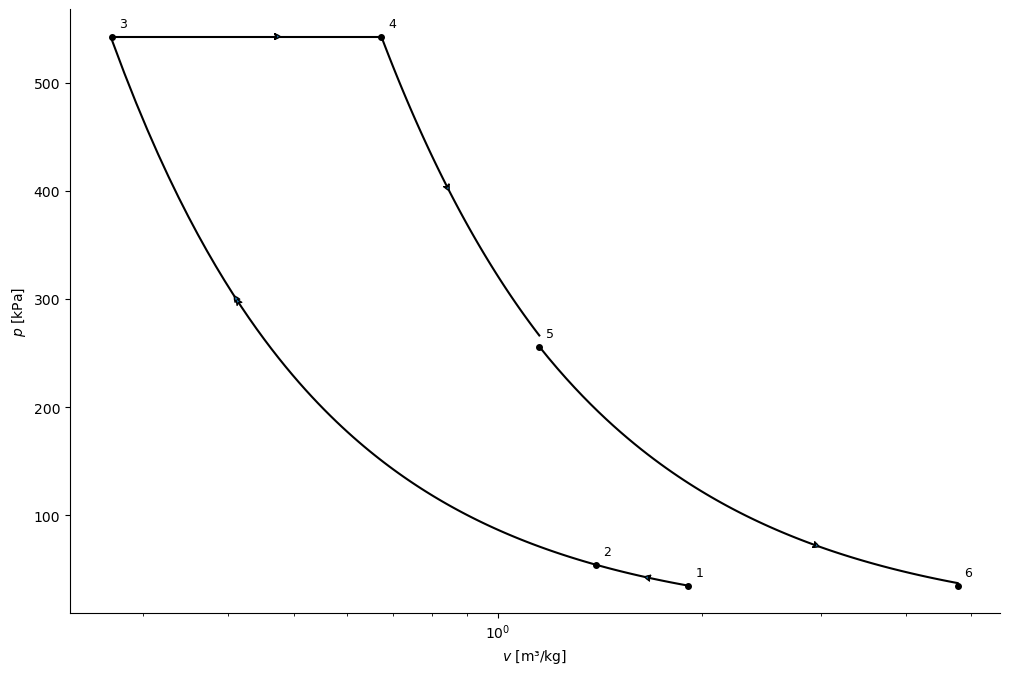

In [9]:
pv = air.pv_diagram()
# The following loop plots and labels a point for each state
for state in [1,2,3,4,5,6]:
    v[state] = air.v(T[state],p[state])
    h[state] = air.h(T[state],p[state])
    s[state] = air.s(T[state],p[state])
    pv.plot_state(states[state], label_loc='north east')

# Enter an appropriate path descriptor for each process, i.e. 'isothermal','isobaric','isochoric','isenthalpic','isentropic','nonideal'
pv.plot_process(states[1],states[2], path='isentropic') # 1->2
pv.plot_process(states[2],states[3], path='isentropic') # 2->3
pv.plot_process(states[3],states[4], path='isobaric') # 3->4
pv.plot_process(states[4],states[5], path='isentropic') # 4->5
pv.plot_process(states[5],states[6], path='isentropic'); # 5->6

pv.ax.set_xscale('log')

#### (g) $T$-$s$ diagram
***Note: the process paths do not line up with the state points in this diagram because the paths were 
calculated for variable specific heat, but the states were calculated using the
cold-air-standard assumptions (constant specific heat).  Therefore the errors resulting from the constant specific heat assumption are evident in the misalignment on the graph.  The larger inconsistencies at the higher temperatures illustrate how the constant specific heat assumption becomes increasing inaccurate as the temperature change of the fluid increases.***

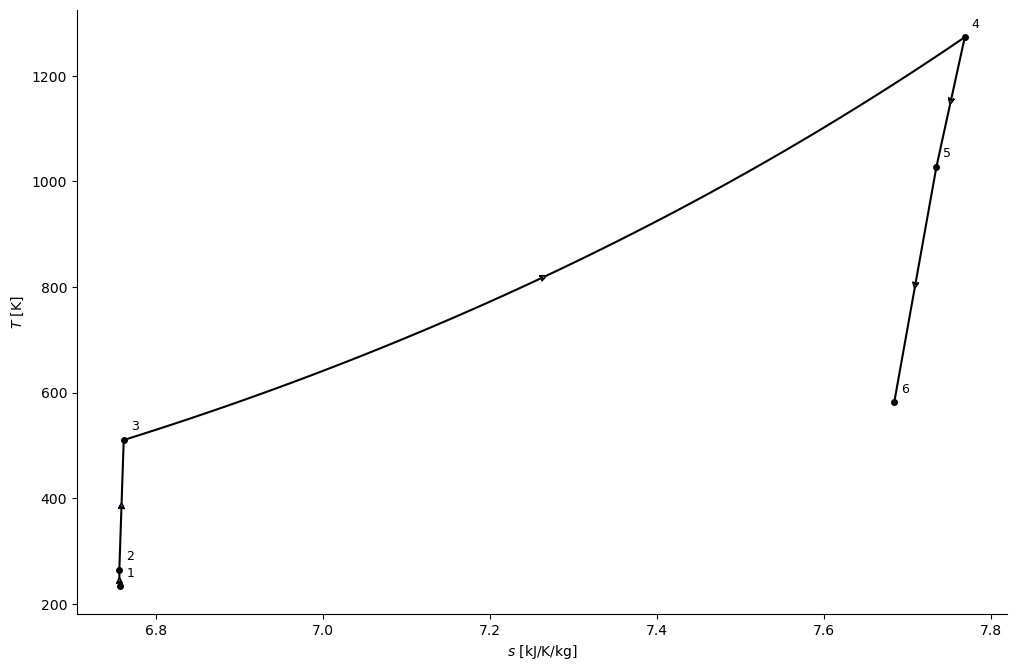

In [10]:
Ts = air.Ts_diagram()
# The following loop plots and labels a point for each state
for state in [1,2,3,4,5,6]:
    Ts.plot_state(states[state], label_loc='north east')

# Enter an appropriate path descriptor for each process, i.e. 'isothermal','isobaric','isochoric','isenthalpic','isentropic'
Ts.plot_process(states[1],states[2], path='isentropic') # 1->2
Ts.plot_process(states[2],states[3], path='isentropic') # 2->3
Ts.plot_process(states[3],states[4], path='isobaric') # 3->4
Ts.plot_process(states[4],states[5], path='isentropic') # 4->5
Ts.plot_process(states[5],states[6], path='isentropic'); # 5->6